In [1]:
import pickle

# Load the data from the provided file
file_path = './Data/Neuchatel_Ti64/segmented_data_dict.pkl'

with open(file_path, 'rb') as file:
    data = pickle.load(file)

# Display the keys of the dictionary and some sample data
data_keys = data.keys()
sample_data = {key: data[key] for key in list(data_keys)}

sample_data[(90,1550,3)].shape


(10, 2, 1398)

In [2]:
data_keys

dict_keys([(90, 1550, 3), (120, 1300, 3), (90, 1050, 3), (120, 300, 3), (120, 550, 3), (120, 1050, 3), (105, 1800, 3), (105, 300, 3), (90, 800, 3), (90, 1300, 3), (105, 800, 4), (120, 800, 4), (105, 1050, 4), (105, 1550, 4), (105, 550, 4), (90, 300, 4), (120, 1800, 4), (105, 1300, 4), (120, 1550, 4), (90, 550, 4)])

In [26]:
import numpy as np
import pandas as pd
from scipy.stats import skew

# Define the extract_features function with positional information
def extract_features(data, start_pos):
    features = {}
    
    data_emission = np.mean(data[:, 0, :], axis=0)
    # Emission features
    features['mean_emission'] = np.mean(data_emission, axis=0)
    features['std_emission'] = np.std(data_emission, axis=0)
    features['median_emission'] = np.median(data_emission, axis=0)
    features['95th_percentile_emission'] = np.percentile(data_emission, 95, axis=0)
    features['5th_percentile_emission'] = np.percentile(data_emission, 5, axis=0)
    #features['skewness_emission'] = skew(data_emission, axis=0)
    
    data_reflection = np.mean(data[:, 1, :], axis=0)
    # Reflection features
    features['mean_reflection'] = np.mean(data_reflection, axis=0)
    features['std_reflection'] = np.std(data_reflection, axis=0)
    features['median_reflection'] = np.median(data_reflection, axis=0)
    features['95th_percentile_reflection'] = np.percentile(data_reflection, 95, axis=0)
    features['5th_percentile_reflection'] = np.percentile(data_reflection, 5, axis=0)
    #features['skewness_reflection'] = skew(data_reflection, axis=0)
    
    # Positional feature
    #features['position'] = start_pos
    
    return features

# Initialize lists for storing features and labels
features_list = []
label_list = []
powers = []
speeds = []

# Initialize a variable to track the start position for the positional feature
start_pos = 0

# Iterate over the sample_data to extract features
for key, value in sample_data.items():
    power, speed, _ = key
    print(power, speed)
    extracted_features = extract_features(value, start_pos)
    
    feats = []
    for k, v in extracted_features.items():
        feats.append(v)
    
    # Store the features and labels
    features_list.append(np.reshape(feats, (1, len(feats))))
    label_list.append((power, speed))
    powers.append(power)
    speeds.append(speed)
    
    # Update the start position for the next iteration
    start_pos += 1
    


90 1550
120 1300
90 1050
120 300
120 550
120 1050
105 1800
105 300
90 800
90 1300
105 800
120 800
105 1050
105 1550
105 550
90 300
120 1800
105 1300
120 1550
90 550


In [27]:
len(feats)

10

In [28]:
np.median(value[:, 0, :], axis=0).shape, value.shape

((3903,), (10, 2, 3903))

In [29]:
len(powers), len(speeds)

(20, 20)

In [30]:
set(speeds)

{300, 550, 800, 1050, 1300, 1550, 1800}

In [31]:
all_data = []
for single_speed in set(speeds):
    single_speed_data = {}
    for (power, speed), val in zip(label_list, features_list):
        if speed == single_speed:
            single_speed_data[(speed, power)] = val
    if len(single_speed_data) != 0:
        all_data.append(single_speed_data)
            

In [32]:
all_data = []
for single_power in set(powers):
    single_power_data = {}
    for (power, speed), val in zip(label_list, features_list):
        if power == single_power:
            single_power_data[(speed, power)] = val
    if len(single_power_data) != 0:
        all_data.append(single_power_data)
            

In [33]:
all_data[0]

{(1300,
  120): array([[0.81070824, 0.23491199, 0.87002571, 1.03535448, 0.06071472,
         1.77350011, 0.37626295, 1.8679046 , 2.0349886 , 0.80609132]]),
 (300,
  120): array([[0.29063551, 0.07036761, 0.30059813, 0.36676635, 0.19468919,
         1.80261102, 0.28723576, 1.87204745, 1.96863714, 1.62848496]]),
 (550,
  120): array([[ 0.37147128,  0.10207594,  0.39245605,  0.46002197, -0.00366211,
          1.66319269,  0.34294614,  1.7604066 ,  1.83718872,  0.60269164]]),
 (1050,
  120): array([[0.79836639, 0.2202301 , 0.8456955 , 1.01709293, 0.31734542,
         1.81456428, 0.365491  , 1.9149627 , 2.02982939, 0.87199779]]),
 (800,
  120): array([[ 0.47245444,  0.15806907,  0.51169588,  0.61112135, -0.00459366,
          1.74066285,  0.44642159,  1.896309  ,  1.98667219,  0.36036377]]),
 (1800,
  120): array([[1.382935  , 0.37226366, 1.47789   , 1.71426706, 0.57978973,
         1.83261729, 0.35963918, 1.9156953 , 2.11593324, 1.0072616 ]]),
 (1550,
  120): array([[1.24226303, 0.32952497,

In [34]:
to_be_clustered = []

for k, v in all_data[1].items():
    speed, power = k  # Extract speed and power from the tuple
    speed_column = np.full((v.shape[0], 1), speed)  # Create a column with speed
    power_column = np.full((v.shape[0], 1), power)  # Create a column with power
    
    extended_v = np.hstack((v, speed_column, power_column))  # Concatenate along columns
    to_be_clustered.append(extended_v)  # Append to the list

In [35]:
k, v.shape

((1300, 105), (1, 10))

In [36]:
X = np.concatenate(to_be_clustered, axis=0)
X.shape

(7, 12)

In [37]:
X

array([[ 1.10152529e+00,  3.22819032e-01,  1.17139437e+00,
         1.40509034e+00,  2.92205800e-02,  1.59463742e+00,
         3.38313251e-01,  1.68466960e+00,  1.82117850e+00,
         5.68820960e-01,  1.80000000e+03,  1.05000000e+02],
       [ 3.39558464e-01,  8.76785977e-02,  3.52523810e-01,
         4.36425784e-01,  2.13560476e-01,  1.77834894e+00,
         3.07799044e-01,  1.84664920e+00,  2.04529563e+00,
         1.45724326e+00,  3.00000000e+02,  1.05000000e+02],
       [ 4.68224609e-01,  1.27809444e-01,  5.00923160e-01,
         5.92637616e-01,  2.74775709e-01,  1.63056351e+00,
         2.92864393e-01,  1.70510110e+00,  1.80442282e+00,
         9.02301062e-01,  8.00000000e+02,  1.05000000e+02],
       [ 8.19284668e-01,  2.05707164e-01,  8.60824560e-01,
         1.02924508e+00,  4.26321412e-01,  1.70982135e+00,
         3.07314221e-01,  1.78211975e+00,  1.92923508e+00,
         1.00655510e+00,  1.05000000e+03,  1.05000000e+02],
       [ 1.20977894e+00,  3.45042153e-01,  1.3057251

In [38]:
from sklearn.cluster import KMeans
import numpy as np

kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
kmeans.labels_
kmeans.cluster_centers_

array([[1.04180262e+00, 2.95228030e-01, 1.11182977e+00, 1.31898578e+00,
        1.78938483e-01, 1.68831623e+00, 3.40940515e-01, 1.77726367e+00,
        1.93977393e+00, 7.54366476e-01, 1.42500000e+03, 1.05000000e+02],
       [4.06428327e-01, 1.11440464e-01, 4.29705305e-01, 5.15409844e-01,
        1.61434429e-01, 1.70378167e+00, 3.22276625e-01, 1.78474432e+00,
        1.93607479e+00, 9.81916286e-01, 5.50000000e+02, 1.05000000e+02]])

In [39]:
kmeans.labels_

array([0, 1, 1, 0, 0, 1, 0], dtype=int32)

In [40]:
N = 1
ap = np.convolve(kmeans.labels_, np.ones(N)/N, mode='valid')


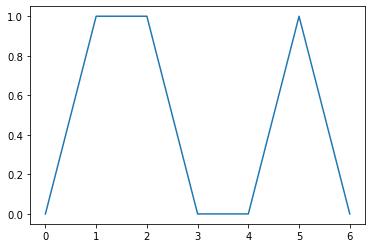

In [41]:
import matplotlib.pyplot as plt

plt.plot(ap)

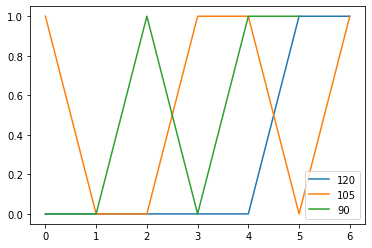

In [42]:
for i in range(len(all_data)):
    to_be_clustered = []
    for k, v in all_data[i].items():
        speed, power = k  # Extract speed and power from the tuple
        speed_column = np.full((v.shape[0], 1), speed/max(speeds))  # Create a column with speed
        power_column = np.full((v.shape[0], 1), power/max(powers))  # Create a column with power

        extended_v = np.hstack((v, speed_column))  # Concatenate along columns
        to_be_clustered.append(extended_v)  # Append to the list
        
    X = np.concatenate(to_be_clustered, axis=0)
    
    kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

    ap = np.convolve(kmeans.labels_, np.ones(N)/N, mode='valid')

    plt.plot(ap, label=k[1])
    plt.legend()

In [43]:
X

array([[ 0.81929467,  0.29456427,  0.89554597,  1.12018369, -0.00395203,
         1.48319613,  0.37906511,  1.5889969 ,  1.78142088,  0.31369781,
         0.86111111],
       [ 0.6057068 ,  0.18841959,  0.64579773,  0.79725647, -0.00355682,
         1.501915  ,  0.33952277,  1.5982513 ,  1.72336587,  0.42428131,
         0.58333333],
       [ 0.50311886,  0.12778312,  0.52641296,  0.62390367,  0.29599761,
         1.53099512,  0.27659021,  1.6069336 ,  1.69950775,  0.8422287 ,
         0.44444444],
       [ 0.83986105,  0.23316793,  0.89524831,  1.06344459,  0.3018982 ,
         1.55425011,  0.2799672 ,  1.6288147 ,  1.74615789,  0.83919981,
         0.72222222],
       [ 0.37633081,  0.08331694,  0.38165283,  0.47756348,  0.29299927,
         1.63891244,  0.22387329,  1.6697385 ,  1.85805978,  1.42889698,
         0.16666667],
       [ 0.41376604,  0.12153323,  0.44126892,  0.51575471, -0.00416565,
         1.71052523,  0.37962752,  1.8417054 ,  1.95578472,  0.56481629,
         0.305

In [44]:
np.repeat(k[0], 10), np.repeat(k[1], 10)

(array([550, 550, 550, 550, 550, 550, 550, 550, 550, 550]),
 array([90, 90, 90, 90, 90, 90, 90, 90, 90, 90]))

In [45]:
v.shape

(1, 10)

Working with data index 0


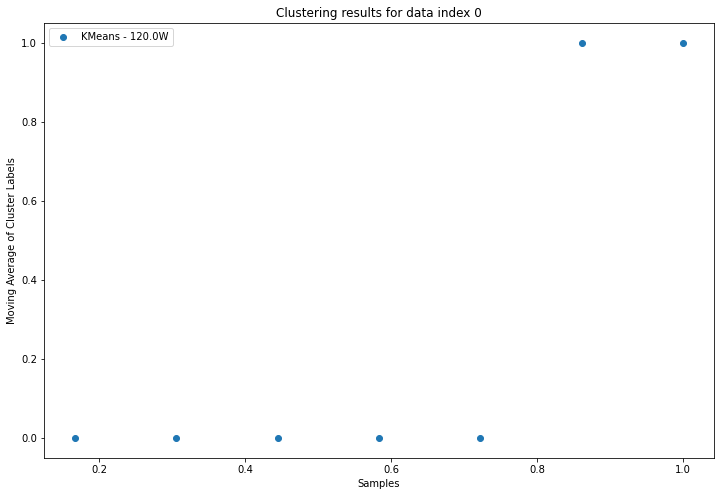

Working with data index 1


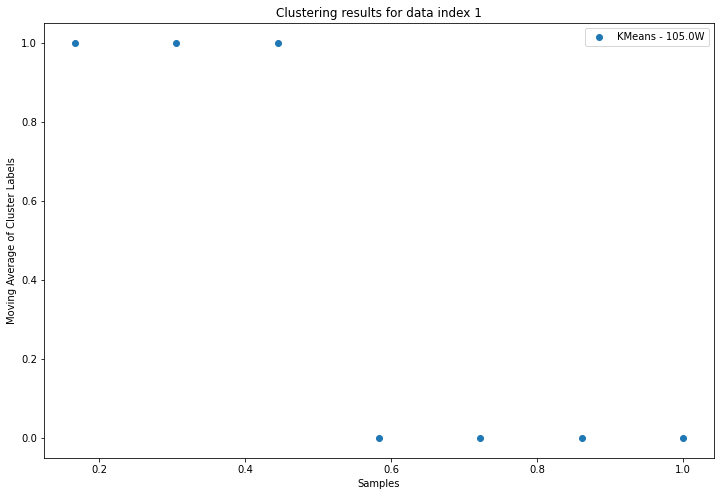

Working with data index 2


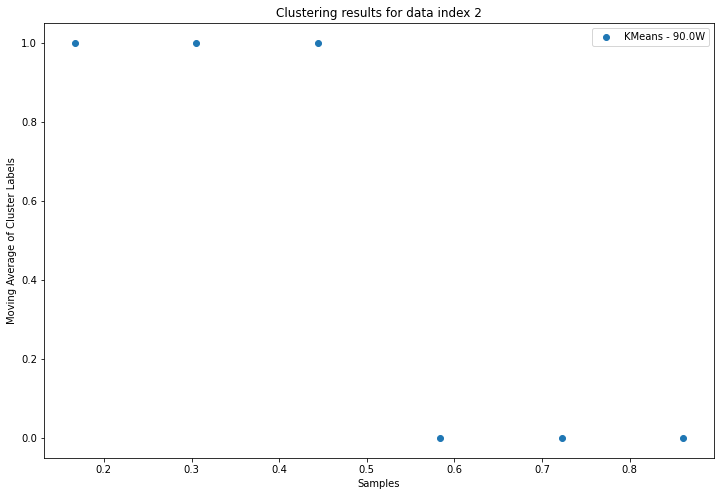

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpectralClustering

# Define N for the moving average
N = 1

# Clustering algorithms
clustering_algorithms = {
    'KMeans': KMeans(n_clusters=2, random_state=0),
    #'AgglomerativeClustering': AgglomerativeClustering(n_clusters=2),
    #'DBSCAN': DBSCAN(),
    #'SpectralClustering': SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans')
}

def prepare_data_for_clustering(data, max_speeds, max_powers):
    """Prepare data for clustering by concatenating speed and power columns, then sort by speed."""
    to_be_clustered = []
    for k, v in data.items():
        speed, power = k  # Extract speed and power from the tuple
        num_rows = v.shape[0]
        
        # Create columns with normalized speed and power
        speed_column = np.full((num_rows, 1), speed / max_speeds)
        power_column = np.full((num_rows, 1), power / max_powers)
        
        # Concatenate data with speed and power columns
        extended_v = np.hstack((v, speed_column, power_column))
        to_be_clustered.append(extended_v)
    
    # Concatenate all data vertically
    X = np.vstack(to_be_clustered)
    
    # Sort by speed column (assuming speed is the last but one column)
    X = X[X[:, -2].argsort()]
    
    return X

def main(all_data, N):
    # Extract max speeds and powers for normalization
    max_speeds = max([max(k[0] for k in data.keys()) for data in all_data])
    max_powers = max([max(k[1] for k in data.keys()) for data in all_data])

    for i in range(len(all_data)):
        data = all_data[i]
        X = prepare_data_for_clustering(data, max_speeds, max_powers)
        
        print(f"Working with data index {i}")

        plt.figure(figsize=(12, 8))
        for algo_name, algorithm in clustering_algorithms.items():
            # Fit the clustering algorithm and predict cluster labels
            if algo_name in ['DBSCAN', 'SpectralClustering']:
                labels = algorithm.fit_predict(X)
            else:
                algorithm.fit(X)
                labels = algorithm.labels_

            # Compute the moving average of the cluster labels
            ap = np.convolve(labels, np.ones(N) / N, mode='valid')

            plt.scatter(X[:, -2], ap, label=f'{algo_name} - {X[0, -1]*max(powers)}W')
        
        plt.legend()
        plt.title(f'Clustering results for data index {i}')
        plt.xlabel('Samples')
        plt.ylabel('Moving Average of Cluster Labels')
        plt.show()

# Example usage
main(all_data, N)


In [ ]:
import ruptures as rpt


In [ ]:
X.shape

In [ ]:
# Detect change points
algo = rpt.Pelt(model="rbf").fit(X)
result = algo.predict(pen=1)



In [ ]:
result

In [ ]:
# Display
rpt.display(signal, bkps, result)
plt.show()

In [ ]:
for i in range(len(all_data)):
    to_be_clustered = []
    for k, v in all_data[i].items():
        speed, power = k  # Extract speed and power from the tuple
        print(power, speed)
        speed_column = np.full((v.shape[0], 1), speed)  # Create a column with speed
        power_column = np.full((v.shape[0], 1), power)  # Create a column with power

        extended_v = np.hstack((v, speed_column, power_column))  # Concatenate along columns
        to_be_clustered.append(extended_v)  # Append to the list
        
    X = np.concatenate(to_be_clustered, axis=0)
    
    print(X.shape)
    
    # Detect change points
    algo = rpt.Pelt(model="rbf").fit(X)
    result = algo.predict(pen=1)
    
    print(power, result)
    

Data shape for index 0: (7, 12)
Power: 120, Detected change points: [5, 7]


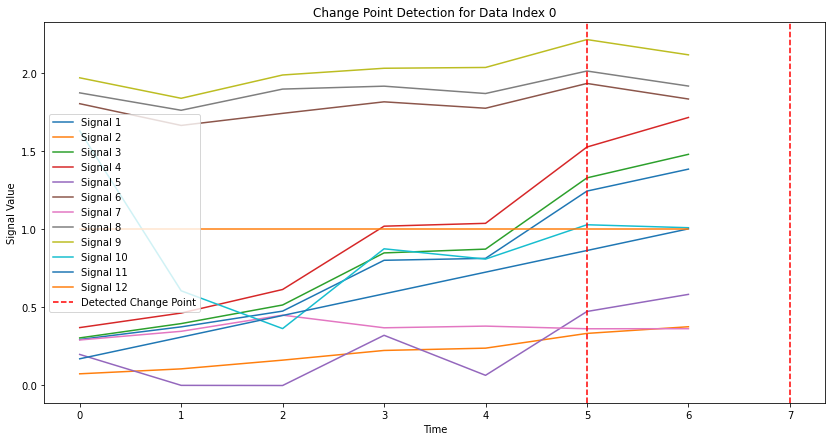

Data shape for index 1: (7, 12)
Power: 105, Detected change points: [5, 7]


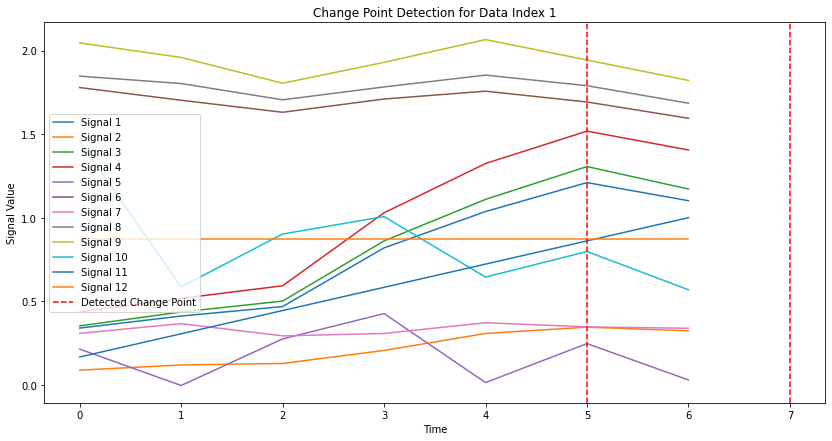

Data shape for index 2: (6, 12)
Power: 90, Detected change points: [6]


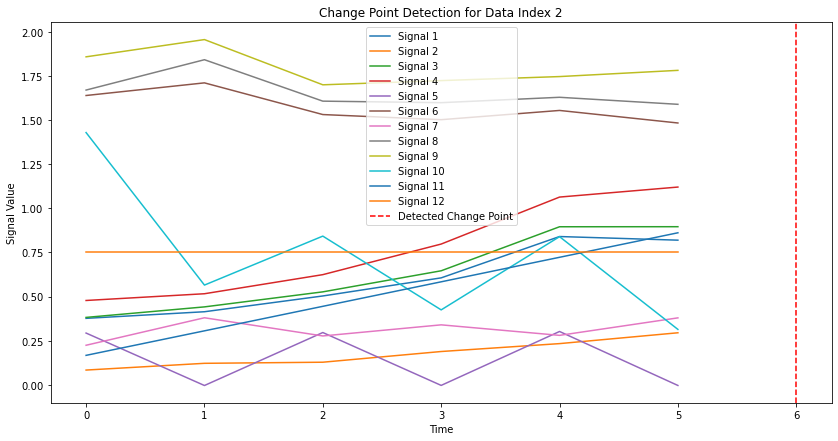

In [47]:
import numpy as np
import ruptures as rpt
import matplotlib.pyplot as plt

def prepare_data_for_clustering(data):
    """Prepare data for clustering by concatenating speed and power columns, then sort by speed."""
    to_be_clustered = []
    for k, v in data.items():
        speed, power = k  # Extract speed and power from the tuple
        num_rows = v.shape[0]
        
        # Create columns with speed and power
        speed_column = np.full((num_rows, 1), speed/max(speeds))
        power_column = np.full((num_rows, 1), power/max(powers))
        
        # Concatenate data with speed and power columns
        extended_v = np.hstack((v, speed_column, power_column))
        to_be_clustered.append(extended_v)
    
    # Concatenate all data vertically
    X = np.vstack(to_be_clustered)
    
    # Sort by speed column (assuming speed is the last but one column)
    X = X[X[:, -2].argsort()]
    
    return X

def detect_change_points(X, penalty=1):
    """Detect change points using the PELT algorithm."""
    algo = rpt.Pelt(model="rbf").fit(X)
    result = algo.predict(pen=penalty)
    return result

def plot_change_points(X, result, index):
    """Plot the time series data and the detected change points."""
    plt.figure(figsize=(14, 7))
    for i in range(X.shape[1]):
        plt.plot(X[:, i], label=f'Signal {i+1}')
    
    for cp in result:
        plt.axvline(x=cp, color='r', linestyle='--', label='Detected Change Point' if cp == result[0] else "")
    
    plt.title(f'Change Point Detection for Data Index {index}')
    plt.xlabel('Time')
    plt.ylabel('Signal Value')
    plt.legend()
    plt.show()

def main(all_data, penalty=1):
    for i in range(len(all_data)):
        data = all_data[i]
        X = prepare_data_for_clustering(data)
        
        print(f"Data shape for index {i}: {X.shape}")
        
        # Detect change points
        result = detect_change_points(X, penalty)
        
        # Extract and print the power value and detected change points
        for k in data.keys():
            _, power = k
            break  # Extract power value from the first key
        
        print(f"Power: {power}, Detected change points: {result}")
        
        # Plot the results
        plot_change_points(X, result, i)

main(all_data, penalty=1)
